In [19]:
import csv
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import glob
import os

from scipy.optimize import curve_fit

In [67]:
def readData(file):
    with open(file) as csv_file:
        E = []
        V = []
        csv_reader = csv_file.readlines()
        for row in csv_reader[1:]:
            v = float(row.split(',')[1])
            t = float(row.split(',')[0])
            V.append(v)
            E.append(t)
            csv_file.close()
    return np.asarray(E),np.asarray(V)
def plotsdefault(xlab='',ylab='',\
                 lw=1,lfs=12,tfs=12,dpi=300,size_x=5,size_y=5,Grid=False):
    plt.rcParams.update(plt.rcParamsDefault)

    plt.rcParams['axes.linewidth'] = lw
    plt.rc('text', usetex=True)
    matplotlib.rcParams["figure.dpi"] = dpi
    matplotlib.rc('font', family='sans-serif') 
    matplotlib.rc('font', serif='Helvetica Neue') 

    fig = plt.figure(figsize=(size_x,size_y))
    ax = fig.add_subplot(111)

    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)

#     ax.tick_params(which='major',direction='in',width=1,length=13,right=True,top=True,pad=7)
#     ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    if Grid:
        ax.grid()
    return fig,ax

def model_velocity(x):
#     par = [-3.1046, 27.037, -2.1668, 193.27, -4.8024, 646.04, 9.2471]
    par = [-1.5000, 28.510, -.21948, 183.49, -1.4320, 1652.9, 2.884]
    return par[0]*np.exp(-x/par[1]) + par[2] * np.exp(-x/par[3]) + par[4]*np.exp(-x/par[5])+par[6]
            

In [9]:
E, V = readData('gushchin.csv')
E2, V2 = readData('exo-200.csv')


In [92]:
# popt, pcov = curve_fit(model_velocity, E, V)
speed = lambda x :  0.097384*pow(np.log10(x*100),3.0622)-0.018614*np.sqrt(x*100)
speed2 = lambda x : 2.150101*(0.929447**(1/x*100))*(x*100)**0.317973

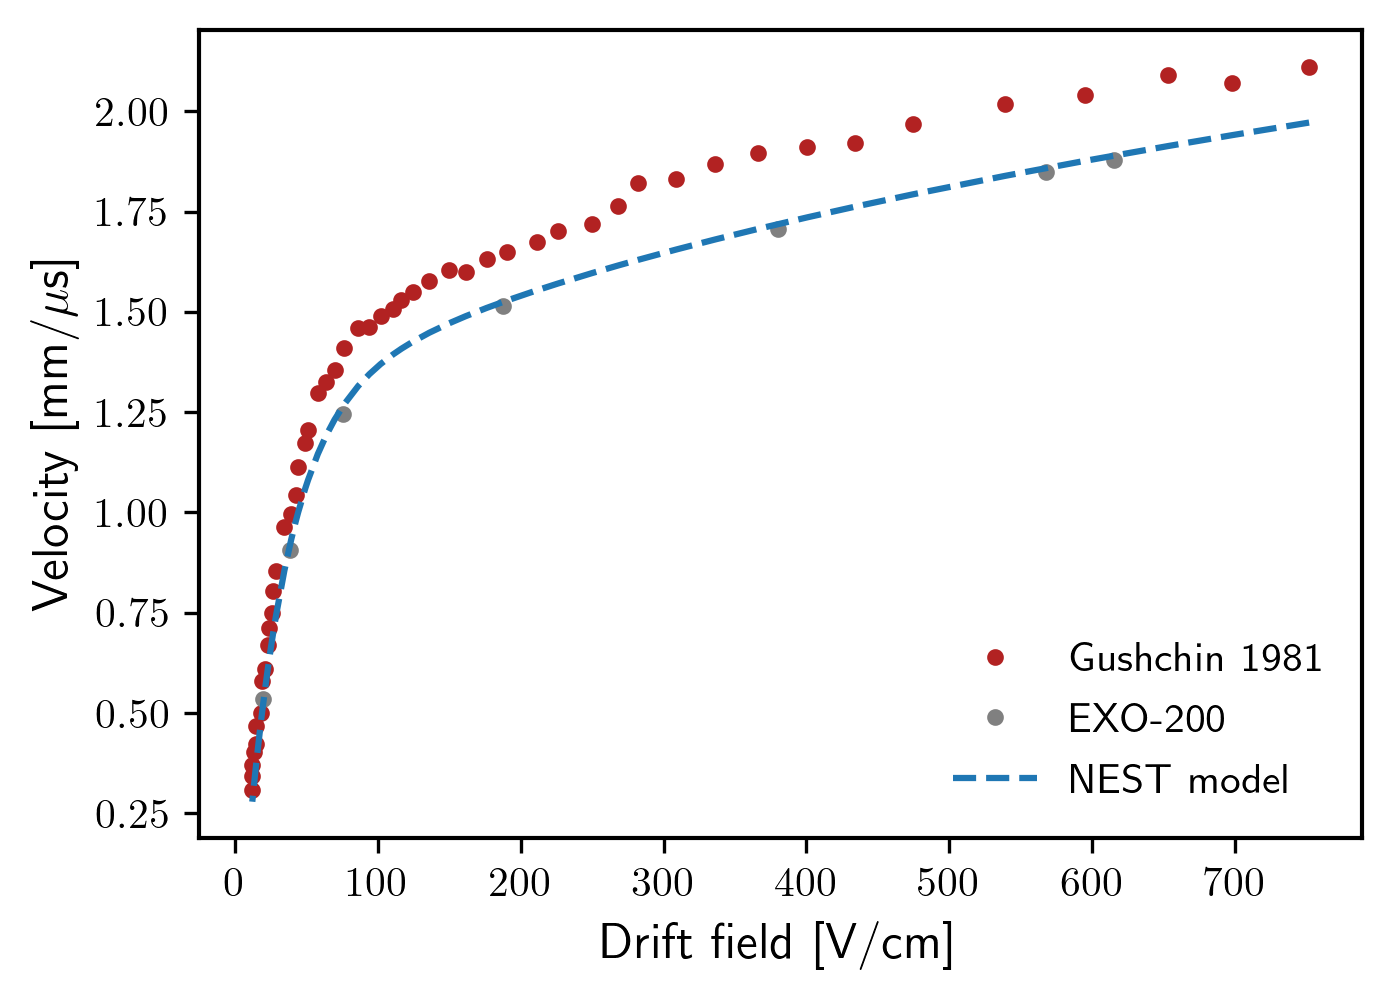

In [93]:
fig, ax = plotsdefault(size_x = 5, size_y = 3.5)

ax.plot(E,V,'.', color='firebrick', label='Gushchin 1981')
# ax.plot(E, speed(E))
# ax.plot(E, speed2(E))

ax.plot(E2,V2,'.', color='gray', label='EXO-200')
ax.plot(E, model_velocity(E), '--',label='NEST model')

plt.ylabel(r'Velocity [mm/$\mu$s]')
plt.xlabel(r'Drift field [V/cm]')
plt.legend(frameon=False, fancybox=False, ncol=1)
plt.show()

In [91]:
curve_fit?

In [77]:
model_velocity(10)

0.19656341634662722

In [96]:
model_velocity((2600)/49.5)

1.094277171324944